In [1]:
cd /content/drive/My Drive/Internship

/content/drive/My Drive/Internship


In [2]:
#Load the dataset from keras datasets module

from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


In [3]:
import numpy as np
from keras.applications import VGG19
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (32, 32, 3), classes = 10)
from keras.applications.vgg19 import preprocess_input
test_features = vgg19.predict(np.array(test_X), batch_size=256, verbose=1)
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

10000/10000 [==============================] - 126s 13ms/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


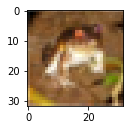

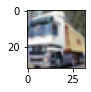

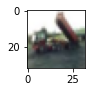

In [4]:
#Plot some images from the dataset to visualize the dataset

n=3
plt.figure(figsize=(10,10))
for i in range(n):
  plt.subplot(350+1+i)
  plt.imshow(train_X[i])
  plt.show()

In [0]:
#Import the required layers and modules to create our convolution neural net architecture

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [0]:
#Convert the pixel values of the dataset to float type and then normalize the dataset

train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [0]:
#Now perform the one-hot encoding for target classes

train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [0]:
#Create the sequential model and add the layers

model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),padding='same',activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
# Defining Stochastic Gradient Descent (SGD)
# Configure the optimizer and compile the model

sgd=SGD(lr=0.01, momentum=0.9, decay=(0.01/25), nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [27]:
#checking model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

In [28]:
# Train the model

model.fit(train_X,train_Y, validation_data=(test_X,test_Y), epochs=10, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 217s 4ms/step - loss: 0.5506 - accuracy: 0.8125 - val_loss: 0.8092 - val_accuracy: 0.7277
Epoch 2/10
50000/50000 [==============================] - 212s 4ms/step - loss: 0.4986 - accuracy: 0.8300 - val_loss: 0.8329 - val_accuracy: 0.7291
Epoch 3/10
50000/50000 [==============================] - 213s 4ms/step - loss: 0.4707 - accuracy: 0.8383 - val_loss: 0.8366 - val_accuracy: 0.7269
Epoch 4/10
50000/50000 [==============================] - 219s 4ms/step - loss: 0.4573 - accuracy: 0.8423 - val_loss: 0.8454 - val_accuracy: 0.7310
Epoch 5/10
50000/50000 [==============================] - 215s 4ms/step - loss: 0.4294 - accuracy: 0.8523 - val_loss: 0.8527 - val_accuracy: 0.7278
Epoch 6/10
50000/50000 [==============================] - 220s 4ms/step - loss: 0.4122 - accuracy: 0.8588 - val_loss: 0.8901 - val_accuracy: 0.7226
Epoch 7/10
50000/50000 [==============================] - 216s

In [12]:
#Calculate its accuracy on testing data

_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

10000/10000 [==============================] - 9s 875us/step
69.92999911308289


In [0]:
#Save the model

model.save("model1_cifar_10epoch.h5")


In [0]:
#Make a dictionary to map to the output classes and make predictions from the model

results={
   0:'Aeroplane',
   1:'Automobile',
   2:'Bird',
   3:'Cat',
   4:'Deer',
   5:'Dog',
   6:'Frog',
   7:'Horse',
   8:'Ship',
   9:'Truck'
}

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [0]:
#Import libraries to input an image to predicts it's class

from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Index : 9 
Class : Truck


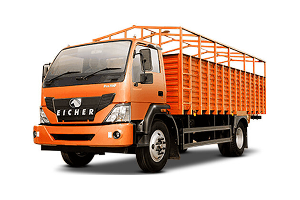

In [49]:
#input the image, resize and predict the class

# 'cv2.imread' returns numpy array, containing the pixel values.
#For colored images, each pixel is represented as an array containing Red, Green and Blue channels.
img = cv2.imread('/content/drive/My Drive/Internship/test_image/14.jpg', )

# the input image is required to be in the shape of dataset, i.e (32,32,3)
res = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
res=np.expand_dims(res, axis=0)
res=np.array(res)

#predicting the class of the input image
pred=model.predict_classes([res])[0]
print(color.BOLD+"Index :",pred,"\nClass :",results[pred] + color.END)
img = cv2.resize(img, dsize=(300, 200), interpolation=cv2.INTER_CUBIC)
cv2_imshow(img)